# Importing All necessary Libraries

In [77]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
%matplotlib inline

# Importing Warnings

In [78]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [79]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Data_Test.xlsx')

# Shape

In [80]:
print("Train_data: ",train.shape)
print('\n')
print("Testing_data : ",test.shape)

Train_data:  (12690, 9)


Testing_data :  (4231, 8)


# column

In [81]:
print("Train_data: ",train.columns)
print('\n')
print("Testing_data : ",test.columns)

Train_data:  Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Testing_data :  Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


# Null values

In [82]:
print("Train_data: ",train.isnull().values.any())
print('\n')
print("Testing_data : ",test.isnull().values.any())

Train_data:  True


Testing_data :  True


Observations : 
    
    Null values are present here.

# Null vales in columns

In [83]:
print("\n\n","Train_data: ","\n\n",train.isnull().sum(),"\n\n")
print("#"*60,"\n\n")
print("Testing_data : ","\n\n",test.isnull().sum(),"\n\n")



 Train_data:  

 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64 


############################################################ 


Testing_data :  

 TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64 




Observations : 
    
    Null values are present in City, Locality,Rating and Votes columns in both training and testing dataset.

# Number of columns

In [84]:
print("\n\nNumber of Features/Columns : ", len(train.columns))
print("\n\nNumber of Features/Columns : ", len(test.columns))



Number of Features/Columns :  9


Number of Features/Columns :  8


# Number of rows

In [85]:
print("\nNumber of Rows : ",len(train))
print("\nNumber of Rows : ",len(test))


Number of Rows :  12690

Number of Rows :  4231


# Data Types

In [86]:
print("\n\nData Types :\n", train.dtypes)
print("\n\nData Types :\n", test.dtypes)



Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object


Data Types :
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object


# Combining trainig set and test sets for analysing data and finding patterns

In [87]:
comb_data = [train[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']], test]

comb_data = pd.concat(comb_data)

In [88]:
comb_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes


# Analysing Data Columnwise

### 1. TITLE

#### Finding Maximum number of titles mentioned in a single cell

In [89]:

titles = list(comb_data['TITLE'])

maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)    

all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())



Maximum Titles in a Cell :  2


Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


### 2. CUISINES

#### Finding Maximum number of cuisines mentioned in a single cell

In [90]:
cuisines = list(comb_data['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []

for i in titles :
    if len(i.split(',')) == 1:
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())



Maximum cuisines in a Cell :  8


Number of Unique cuisines :  25


Unique cuisines:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


### 3. CITY

In [91]:
cities = list(comb_data['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(cities).unique())
 
cities = list(pd.Series(cities).unique())



Number of Unique cities (Including NOT AVAILABLE):  445


Unique Cities:
 ['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'NOT AVAILABLE' 'INDIA'
 'MADHURANAGAR' 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVA

### 4. LOCALITY

In [92]:
localities = list(comb_data['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(localities).unique())

localities = list(pd.Series(localities).unique())



Number of Unique Localities (Including NOT AVAILABLE) :  1611


Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


# Data Cleaning

### 1. TITLE

In [93]:
#_____________________________

          #Train

#_____________________________

titles = list(train['TITLE'])

#Maximum number of titles in a cell is 2 . So, we will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')




### 2. CUISINE

In [94]:
cuisines = list(train['CUISINES'])
   
# Maximum number of cuisines in a cell is 8. So, we will will split title in to 8 columns.
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')





### 3. City

In [95]:
cities = list(train['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
    



### 4. LOCALITY

In [96]:
localities = list(train['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper() 
    
    



### 5. RATING

In [97]:
rates = list(train['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan


### 6. VOTES

In [98]:
votes = list(train['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass   




In [99]:
idx = len(pd.Index(train))
print(idx)

12690


# Rename Column

In [100]:
#_____________________________

          #Train

#_____________________________


train_new = {}

train_new['TITLE1'] = T1
train_new['TITLE2'] = T2
train_new['RESTAURANT_ID'] = train["RESTAURANT_ID"]
train_new['CUISINE1'] = C1
train_new['CUISINE2'] = C2
train_new['CUISINE3'] = C3
train_new['CUISINE4'] = C4
train_new['CUISINE5'] = C5
train_new['CUISINE6'] = C6
train_new['CUISINE7'] = C7
train_new['CUISINE8'] = C8
train_new['CITY'] = cities
train_new['LOCALITY'] = localities
train_new['RATING'] = rates
train_new['VOTES'] = votes
train_new['COST'] = train["COST"]

train_new = pd.DataFrame(train_new)



# TEST

### 1. TITLE

In [101]:
#_____________________________

          #Test

#_____________________________


titles = list(test['TITLE'])

#Maximum number of titles in a cell is 2 . So, we will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

### 2. CUISINES

In [102]:
#_____________________________

          #Test

#_____________________________


cuisines = list(test['CUISINES'])
   
# Maximum number of cuisines in a cell is 8. So, we will will split title in to 8 columns.
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

### 3. CITY

In [103]:
#_____________________________

          #Test

#_____________________________


cities = list(test['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

### 4. LOCALITY

In [104]:
#_____________________________

          #Test

#_____________________________



localities = list(test['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper() 

### 5. RATING

In [105]:
#_____________________________

          #Test

#_____________________________



rates = list(test['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

### 6. VOTES

In [106]:
#_____________________________

          #Test

#_____________________________


votes = list(test['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass   

In [107]:
#_____________________________

          #Test

#_____________________________


test_new = {}

test_new['TITLE1'] = T1
test_new['TITLE2'] = T2
test_new['RESTAURANT_ID'] = test["RESTAURANT_ID"]
test_new['CUISINE1'] = C1
test_new['CUISINE2'] = C2
test_new['CUISINE3'] = C3
test_new['CUISINE4'] = C4
test_new['CUISINE5'] = C5
test_new['CUISINE6'] = C6
test_new['CUISINE7'] = C7
test_new['CUISINE8'] = C8
test_new['CITY'] = cities
test_new['LOCALITY'] = localities
test_new['RATING'] = rates
test_new['VOTES'] = votes

test_new = pd.DataFrame(test_new)

In [108]:
print("\n\n train_new: \n", train_new.head(),"\n\n\n")
print("#"*60,"\n\n")
print("\n\n test_new: \n", test_new.head())



 train_new: 
            TITLE1 TITLE2  RESTAURANT_ID      CUISINE1       CUISINE2  \
0   CASUAL DINING   NONE           9438       MALWANI           GOAN   
1   CASUAL DINING    BAR          13198         ASIAN  MODERN INDIAN   
2   CASUAL DINING   NONE          10915  NORTH INDIAN        CHINESE   
3     QUICK BITES   NONE           6346       TIBETAN        CHINESE   
4  DESSERT PARLOR   NONE          15387      DESSERTS           NONE   

       CUISINE3    CUISINE4 CUISINE5 CUISINE6 CUISINE7 CUISINE8     CITY  \
0  NORTH INDIAN        NONE     NONE     NONE     NONE     NONE    THANE   
1      JAPANESE        NONE     NONE     NONE     NONE     NONE  CHENNAI   
2       BIRYANI  HYDERABADI     NONE     NONE     NONE     NONE  CHENNAI   
3          NONE        NONE     NONE     NONE     NONE     NONE   MUMBAI   
4          NONE        NONE     NONE     NONE     NONE     NONE   MUMBAI   

         LOCALITY  RATING  VOTES  COST  
0  DOMBIVALI EAST     3.6   49.0  1200  
1       RAMA

# Data Preprocessing

### Imputing Missing Values

In [109]:
#_____________________________

          #Train

#_____________________________


print("\n\nMissing Values in Training Set\n","#"*60)
print("\nContains NaN/Empty cells : ", train_new.isnull().values.any())
print("\nTotal empty cells by column\n","_"*60,"\n", train_new.isnull().sum())

train_new.fillna(0, inplace = True)

print("\n\nAfter Filling 0:\n","_"*60,"\n")
print("\nContains NaN/Empty cells : ", train_new.isnull().values.any())

#_____________________________

          #Test

#_____________________________


print("\n\nMissing Values in Test Set \n","#"*60)
print("\nContains NaN/Empty cells : ", test_new.isnull().values.any())
print("\nTotal empty cells by column\n","_"*60,"\n", test_new.isnull().sum())


test_new.fillna(0, inplace = True)

print("\n\nAfter Filling 0 :\n","_"*60,"\n")
print("\nContains NaN/Empty cells : ", test_new.isnull().values.any())
print("\n\n")



Missing Values in Training Set
 ############################################################

Contains NaN/Empty cells :  True

Total empty cells by column
 ____________________________________________________________ 
 TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING           1204
VOTES            1204
COST                0
dtype: int64


After Filling 0:
 ____________________________________________________________ 


Contains NaN/Empty cells :  False


Missing Values in Test Set 
 ############################################################

Contains NaN/Empty cells :  True

Total empty cells by column
 ____________________________________________________________ 
 TITLE1             0
TITLE2             0
RESTAURANT_ID      0
CUISINE1     

# Summary Statistics

In [110]:
train_new.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.426296,376.231127,655.252246
std,4504.874150,1.179799,810.946942,627.003540
min,0.000000,0.000000,0.000000,20.000000
25%,3863.250000,3.400000,39.250000,300.000000
50%,7740.000000,3.800000,132.000000,500.000000
75%,11688.750000,4.000000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


Observations : 
    
    Observations:

1. Maximum values of RESTAURANT_ID,RATING,VOTES,COST are 15573.000000,4.900000,41186.000000,14000.000000

2. Minimum values of RESTAURANT_ID,RATING,VOTES,COST are 0.000000,0.000000,0.000000,20.000000

3. In RESTAURANT_ID,VOTES and COST column mean is greater than median therefore data is right skewed for these attributes.

5. In RATING column median is greater than mean therefre data is left skewed for these attributes.

6. The difference between 75% and maximum is higher in VOTES and COST columns therefore outliers are present in these columns.

# Correlation

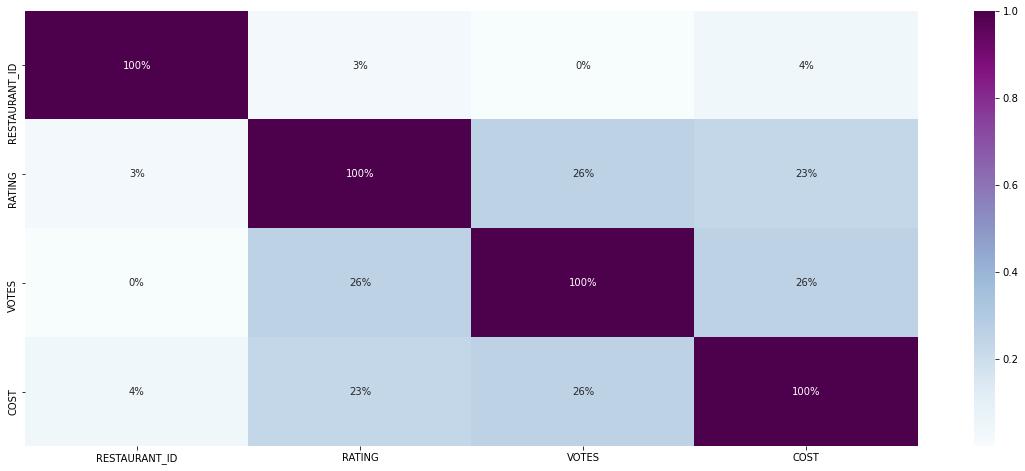

In [111]:
plt.figure(figsize=(20,8))
sns.heatmap(train_new.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Observations : 
    
    1. The correlation of VOTES and RATING columns with the target column COST is 26% and 23% .
    
    2. But there are very few correlation with RESTAURANT_ID column which is only 4%.
    
    4. Good correlation among other columns : 
        
        1. VOTES vs COST (26%)
        
        2. VOTES vs RATING (26%)
        
        3. RATING vs COST (23%)

### Correlation with target column

Text(0.5, 1.0, 'Correlation with Target Variable')

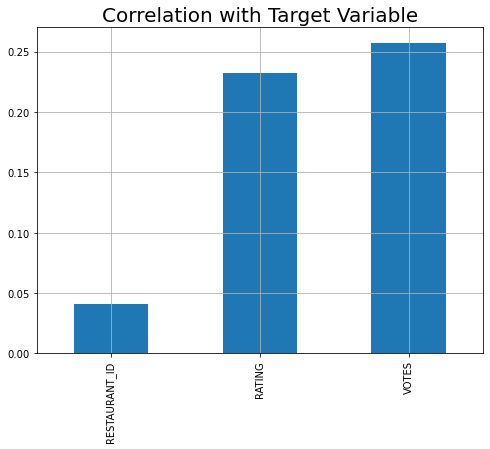

In [112]:
plt.figure(figsize=(8,6))
train_new.drop('COST',axis=1).corrwith(train_new['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable",fontsize=20)

Observations : 
    
    1. There are very good correlation with VOTES and RATING column. There are no negative correlation.

# Checking Outliers

In [113]:
train_new.shape

(12690, 16)

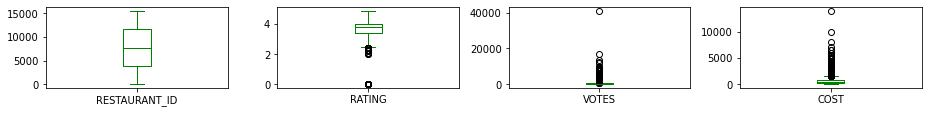

In [114]:
train_new.plot(kind='box',subplots=True,layout=(4,4),color='green',figsize=(13,6))
plt.tight_layout()

Observations : 
    
    In the "RATING", "VOTES" and "COST" columns outliers are present

# Visualization

In [115]:
train_new.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49.0,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30.0,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221.0,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24.0,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165.0,300


In [116]:
train_new.nunique()

TITLE1              23
TITLE2              20
RESTAURANT_ID    11892
CUISINE1           104
CUISINE2            99
CUISINE3            94
CUISINE4            86
CUISINE5            79
CUISINE6            70
CUISINE7            47
CUISINE8            20
CITY               355
LOCALITY          1399
RATING              31
VOTES             1848
COST                86
dtype: int64

# Visualisation 

In [117]:
for col in train_new:
    print(train_new[col].value_counts())

QUICK BITES       4337
CASUAL DINING     4122
NONE              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
MEAT SHOP            3
CONFECTIONERY        3
Name: TITLE1, dtype: int64
NONE              11208
BAR                 428
QUICK BITES         261
CASUAL DINING       257
DESSERT PARLOR      138
CAFÉ                 94
BAKERY               69
SWEET SHOP           53
LOUNGE               47
PUB                  35
BEVERAGE SHOP        34
MICROBREWERY         27
FOOD COURT           15
FINE DINING           8
CLUB                  5
KIOSK                 4
IRANI CAFE            3
CONFECTIONERY         2
PAAN SHOP   

# Bivariate

### TITLE1 vs COST

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'CASUAL DINING'),
  Text(1, 0, 'QUICK BITES'),
  Text(2, 0, 'DESSERT PARLOR'),
  Text(3, 0, 'CAFÉ'),
  Text(4, 0, 'MICROBREWERY'),
  Text(5, 0, 'BAKERY'),
  Text(6, 0, 'NONE'),
  Text(7, 0, 'BAR'),
  Text(8, 0, 'PUB'),
  Text(9, 0, 'BEVERAGE SHOP'),
  Text(10, 0, 'FINE DINING'),
  Text(11, 0, 'SWEET SHOP'),
  Text(12, 0, 'FOOD COURT'),
  Text(13, 0, 'LOUNGE'),
  Text(14, 0, 'FOOD TRUCK'),
  Text(15, 0, 'MESS'),
  Text(16, 0, 'KIOSK'),
  Text(17, 0, 'CLUB'),
  Text(18, 0, 'DHABA'),
  Text(19, 0, 'MEAT SHOP'),
  Text(20, 0, 'COCKTAIL BAR'),
  Text(21, 0, 'CONFECTIONERY'),
  Text(22, 0, 'PAAN SHOP')])

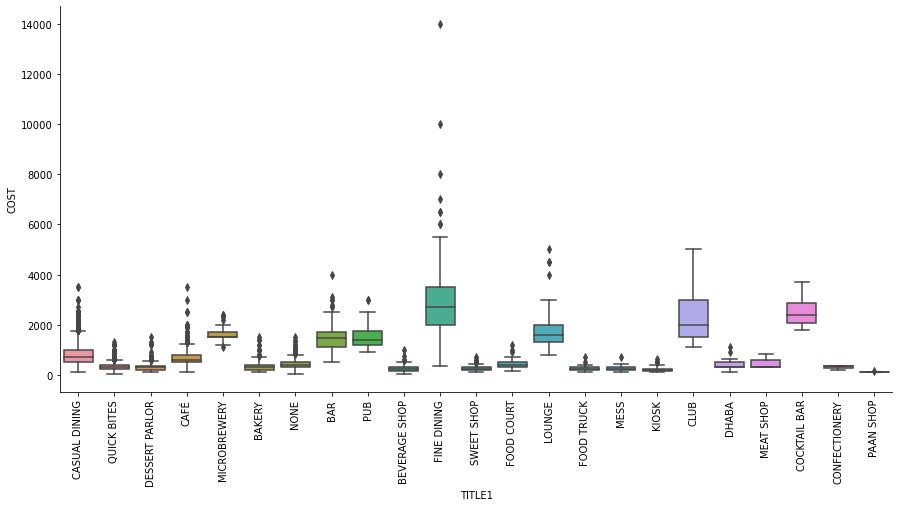

In [121]:
x=sns.catplot(x="TITLE1", y="COST", kind="box", data=train_new)
x.fig.set_size_inches(15,6)
plt.xticks(rotation='vertical')

### TITLE2 vs COST

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'NONE'),
  Text(1, 0, 'BAR'),
  Text(2, 0, 'BEVERAGE SHOP'),
  Text(3, 0, 'IRANI CAFE'),
  Text(4, 0, 'QUICK BITES'),
  Text(5, 0, 'CASUAL DINING'),
  Text(6, 0, 'DESSERT PARLOR'),
  Text(7, 0, 'SWEET SHOP'),
  Text(8, 0, 'LOUNGE'),
  Text(9, 0, 'FOOD COURT'),
  Text(10, 0, 'KIOSK'),
  Text(11, 0, 'CAFÉ'),
  Text(12, 0, 'CONFECTIONERY'),
  Text(13, 0, 'MICROBREWERY'),
  Text(14, 0, 'PUB'),
  Text(15, 0, 'BAKERY'),
  Text(16, 0, 'CLUB'),
  Text(17, 0, 'FINE DINING'),
  Text(18, 0, 'FOOD TRUCK'),
  Text(19, 0, 'PAAN SHOP')])

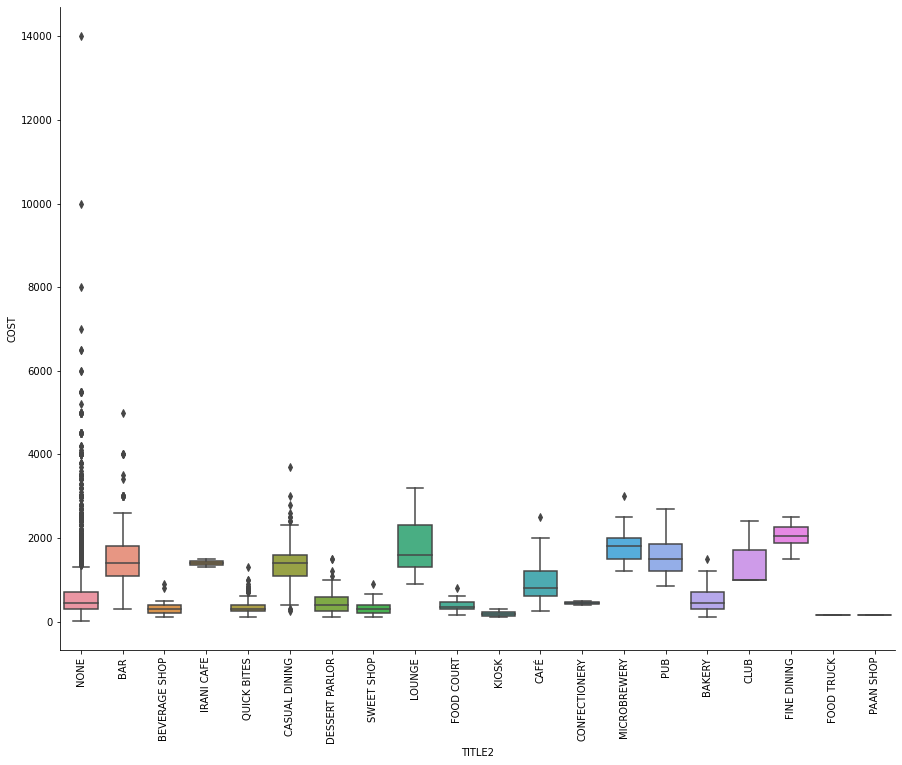

In [123]:
x=sns.catplot(x="TITLE2", y="COST", kind="box", data=train_new)
x.fig.set_size_inches(15,10)
plt.xticks(rotation='vertical')

### RATING vs COST

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.4'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.6'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.8'),
  Text(20, 0, '3.9'),
  Text(21, 0, '4.0'),
  Text(22, 0, '4.1'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '4.9')])

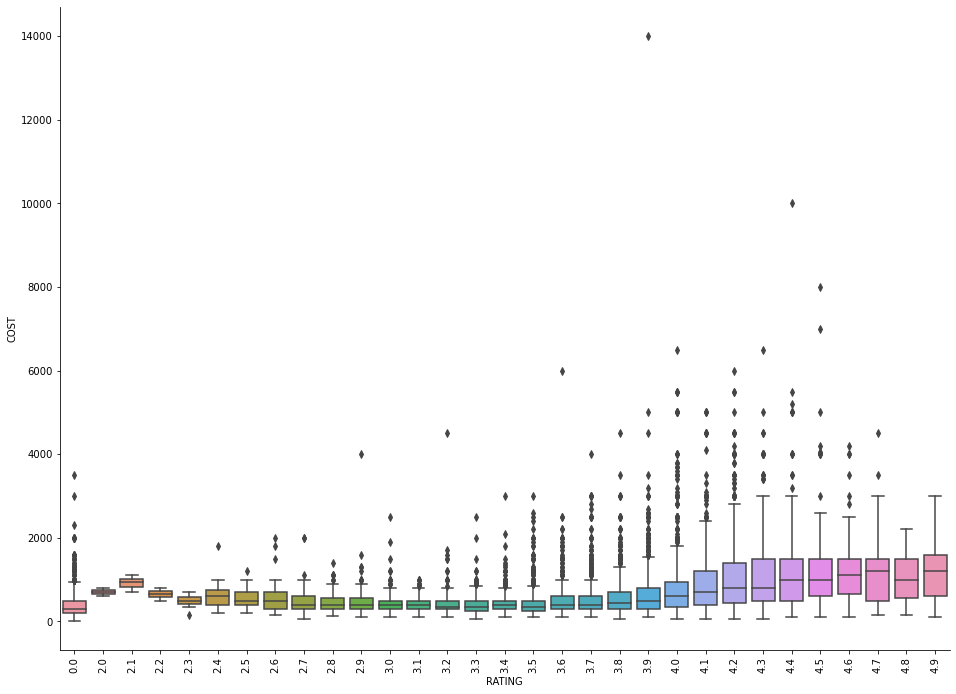

In [133]:
x=sns.catplot(x="RATING", y="COST", kind="box", data=train_new)
x.fig.set_size_inches(15,10)
plt.xticks(rotation='vertical')

### CUISINE7 vs COST

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'NONE'),
  Text(1, 0, 'BIRYANI'),
  Text(2, 0, 'TEA'),
  Text(3, 0, 'BURGER'),
  Text(4, 0, 'SANDWICH'),
  Text(5, 0, ''),
  Text(6, 0, 'EUROPEAN'),
  Text(7, 0, 'NORTH INDIAN'),
  Text(8, 0, 'ITALIAN'),
  Text(9, 0, 'BBQ'),
  Text(10, 0, 'VIETNAMESE'),
  Text(11, 0, 'PIZZA'),
  Text(12, 0, 'SALAD'),
  Text(13, 0, 'DUMPLINGS'),
  Text(14, 0, 'DESSERTS'),
  Text(15, 0, 'BURMESE'),
  Text(16, 0, 'SEAFOOD'),
  Text(17, 0, 'BEVERAGES'),
  Text(18, 0, 'FRENCH'),
  Text(19, 0, 'ARABIAN'),
  Text(20, 0, 'CHINESE'),
  Text(21, 0, 'LUCKNOWI'),
  Text(22, 0, 'HEALTHY FOOD'),
  Text(23, 0, 'MANGALOREAN'),
  Text(24, 0, 'MOMOS'),
  Text(25, 0, 'INDONESIAN'),
  Text(26, 0, 'MUGHLAI'),
  Text(27, 0, 'MEDITERRANEAN'),
  Text(28, 0, 'LEBANESE'),
  Text(29, 0, 'PARSI'),
  Text(30

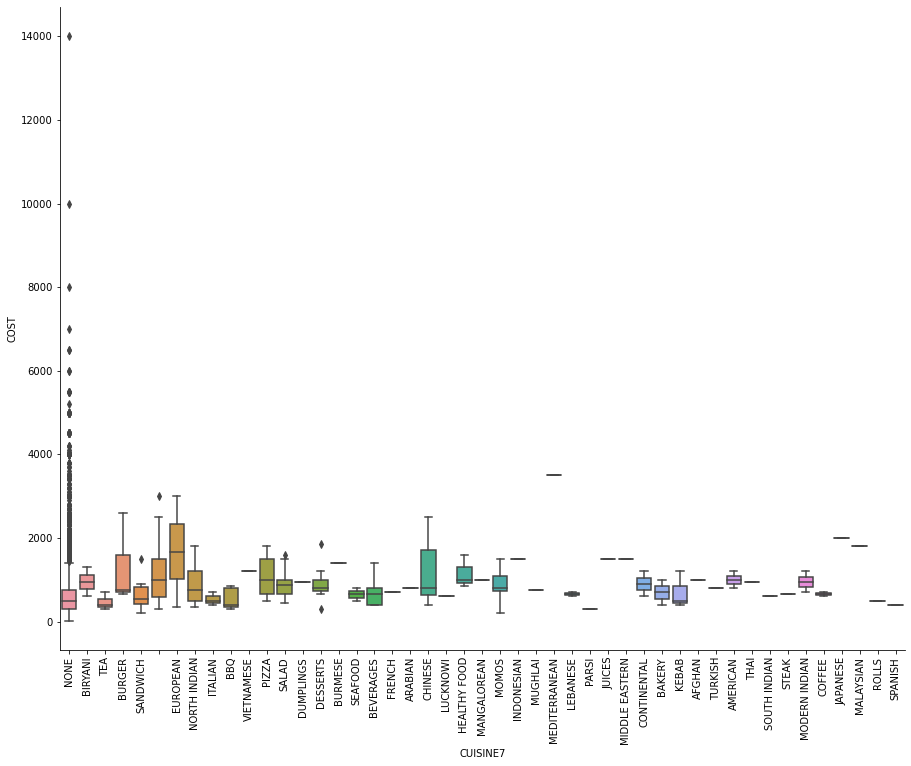

In [134]:
x=sns.catplot(x="CUISINE7", y="COST", kind="box", data=train_new)
x.fig.set_size_inches(15,10)
plt.xticks(rotation='vertical')

### CUISINE8 vs COST

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'NONE'),
  Text(1, 0, ''),
  Text(2, 0, 'HEALTHY FOOD'),
  Text(3, 0, 'PIZZA'),
  Text(4, 0, 'ICE CREAM'),
  Text(5, 0, 'LEBANESE'),
  Text(6, 0, 'DESSERTS'),
  Text(7, 0, 'ASIAN'),
  Text(8, 0, 'MEXICAN'),
  Text(9, 0, 'FAST FOOD'),
  Text(10, 0, 'ROLLS'),
  Text(11, 0, 'BEVERAGES'),
  Text(12, 0, 'CHINESE'),
  Text(13, 0, 'MOMOS'),
  Text(14, 0, 'NORTH INDIAN'),
  Text(15, 0, 'BURGER'),
  Text(16, 0, 'COFFEE AND TEA'),
  Text(17, 0, 'CAFE FOOD'),
  Text(18, 0, 'SALAD'),
  Text(19, 0, 'EUROPEAN')])

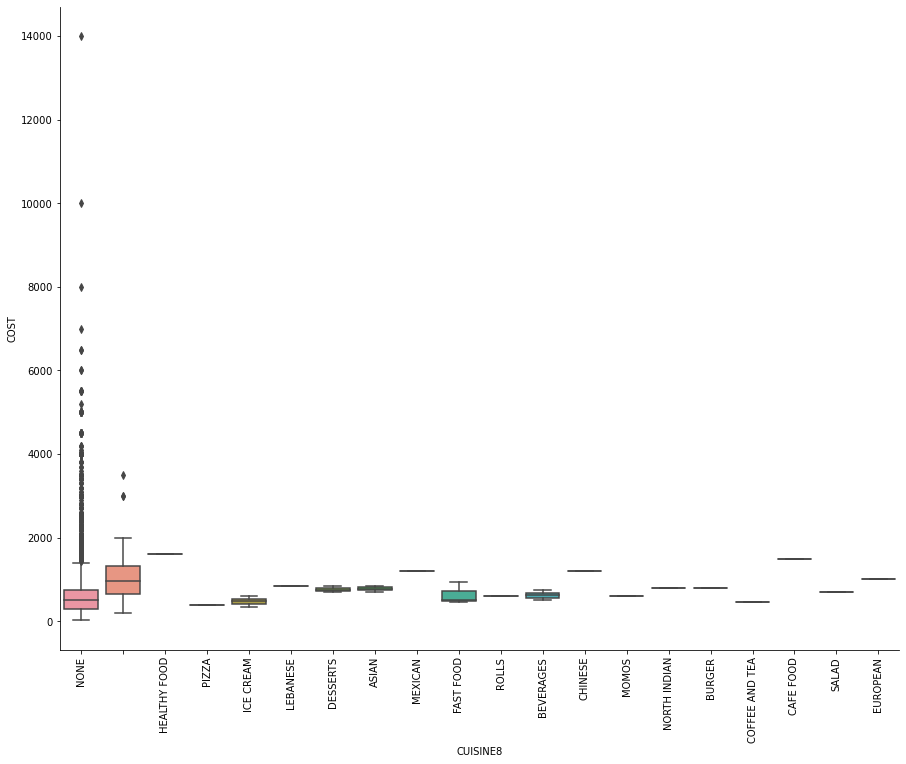

In [135]:
x=sns.catplot(x="CUISINE8", y="COST", kind="box", data=train_new)
x.fig.set_size_inches(15,10)
plt.xticks(rotation='vertical')

Observations : 
    
    Outliers are present in the None column. We need to fix it.

# Encoding Categorical Variables

In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in train_new.columns:
    if train_new[column].dtype==np.number:
        continue
    train_new[column]=le.fit_transform(train_new[column]) 

# Check the numerical Data

In [42]:
train_new.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,4,15,7196,59,32,67,61,58,47,32,15,327,279,3.6,49.0,36
1,4,1,10075,6,60,41,61,58,47,32,15,67,1038,4.2,30.0,43
2,4,15,8349,72,23,12,32,58,47,32,15,67,1093,3.8,221.0,28
3,21,15,4876,100,23,65,61,58,47,32,15,225,127,4.1,24.0,28
4,8,15,11747,28,65,65,61,58,47,32,15,225,613,3.8,165.0,14


# Removing Outliers 

In [43]:
train_new.dtypes

TITLE1             int32
TITLE2             int32
RESTAURANT_ID      int64
CUISINE1           int32
CUISINE2           int32
CUISINE3           int32
CUISINE4           int32
CUISINE5           int32
CUISINE6           int32
CUISINE7           int32
CUISINE8           int32
CITY               int32
LOCALITY           int32
RATING           float64
VOTES            float64
COST               int64
dtype: object

### Z_score

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train_new))
threshold=3
train_new1=train_new[(z<3).all(axis=1)]

In [45]:
train_new1.shape

(10850, 16)

In [46]:
train_new.shape

(12690, 16)

# Percentage Loss

In [47]:
percentage_loss=(1840/12690)*100
print(percentage_loss)

14.49960598896769


We are loosing 14% data. So, we can contine our process with outliers

# IQR

In [48]:
q1=train_new.quantile(0.25)
q3=train_new.quantile(0.75)
IQR=q3-q1
print(IQR)

TITLE1             17.00
TITLE2              0.00
RESTAURANT_ID    5954.50
CUISINE1           47.00
CUISINE2           42.00
CUISINE3           28.00
CUISINE4            0.00
CUISINE5            0.00
CUISINE6            0.00
CUISINE7            0.00
CUISINE8            0.00
CITY              158.00
LOCALITY          673.00
RATING              0.60
VOTES             365.75
COST               14.00
dtype: float64


In [49]:
train_new1=train_new[~((train_new<(q1-1.5*IQR))|(train_new>(q3+1.5*IQR))).any(axis=1)]
print(train_new1.shape)

(7188, 16)


We are loosing more data

# Skewness

In [50]:
train_new.columns

Index(['TITLE1', 'TITLE2', 'RESTAURANT_ID', 'CUISINE1', 'CUISINE2', 'CUISINE3',
       'CUISINE4', 'CUISINE5', 'CUISINE6', 'CUISINE7', 'CUISINE8', 'CITY',
       'LOCALITY', 'RATING', 'VOTES', 'COST'],
      dtype='object')

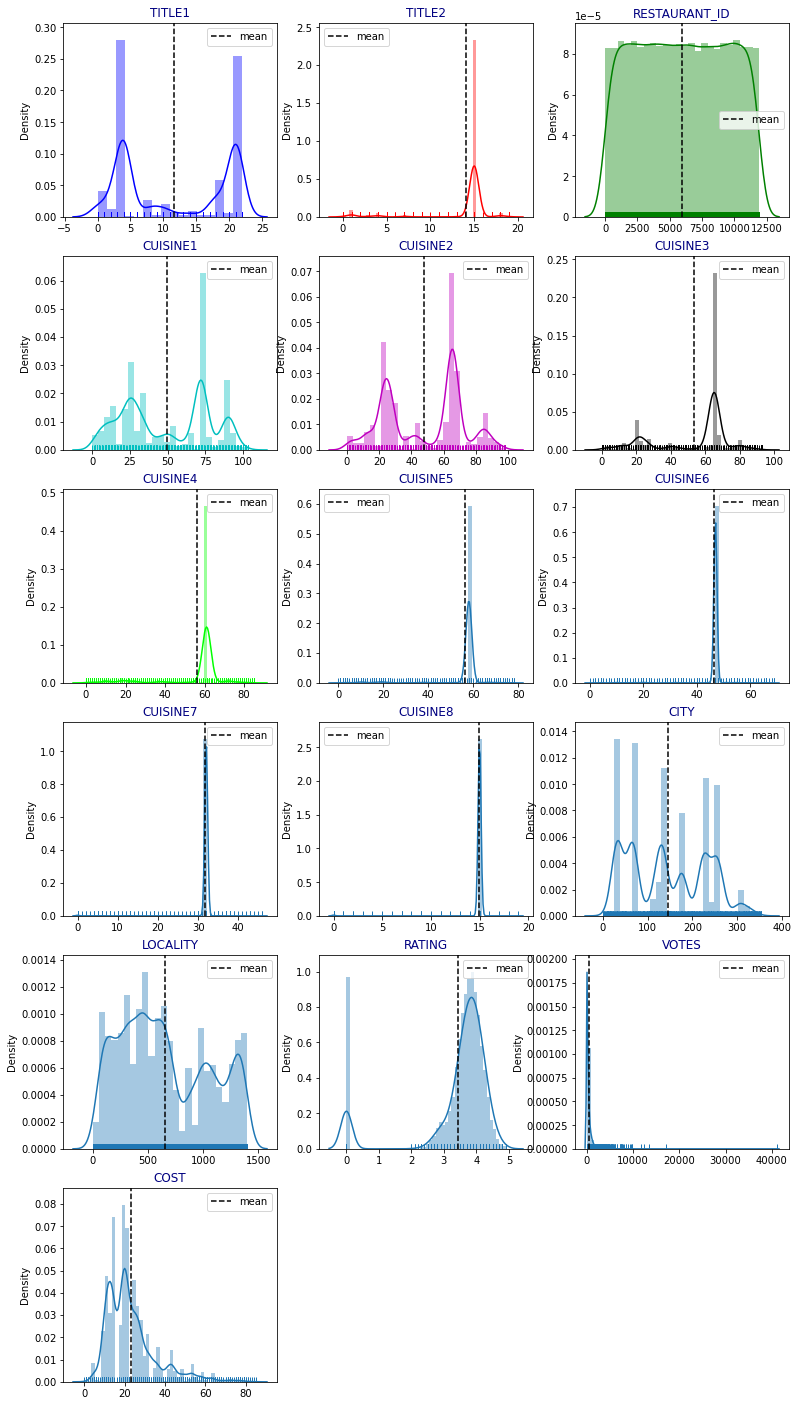

In [51]:
import itertools
cols=['TITLE1', 'TITLE2', 'RESTAURANT_ID', 'CUISINE1', 'CUISINE2', 'CUISINE3',
       'CUISINE4', 'CUISINE5', 'CUISINE6', 'CUISINE7', 'CUISINE8', 'CITY',
       'LOCALITY', 'RATING', 'VOTES', 'COST']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,3,j+1)
    ax=sns.distplot(train_new[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(train_new[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Observations : 
    
    1. 'TITLE1', 'TITLE2','CUISINE1', 'CUISINE2',
       'CUISINE4', 'CUISINE5', 'CUISINE6', 'CUISINE7', 'CUISINE8','RATING','Density' columns the peak point is too high. Most probably outliers are present here.
        
    2.In the 'Density','rating' column we can see the skewness    

# Checking negative values

In [52]:
(train_new < 0).any().any()

False

In [53]:
# Treating Skewness by log transform method

In [54]:
#train_new=np.log(train_new)

In [55]:
train_new.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,4,15,7196,59,32,67,61,58,47,32,15,327,279,3.6,49.0,36
1,4,1,10075,6,60,41,61,58,47,32,15,67,1038,4.2,30.0,43
2,4,15,8349,72,23,12,32,58,47,32,15,67,1093,3.8,221.0,28
3,21,15,4876,100,23,65,61,58,47,32,15,225,127,4.1,24.0,28
4,8,15,11747,28,65,65,61,58,47,32,15,225,613,3.8,165.0,14


In [56]:
train_new=pd.DataFrame(train_new)
train_new.isnull().sum()

TITLE1           0
TITLE2           0
RESTAURANT_ID    0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

# Splitting the data into input and output variable

In [57]:
x=train_new.drop(columns=['COST'],axis=1)
x.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,4,15,7196,59,32,67,61,58,47,32,15,327,279,3.6,49.0
1,4,1,10075,6,60,41,61,58,47,32,15,67,1038,4.2,30.0
2,4,15,8349,72,23,12,32,58,47,32,15,67,1093,3.8,221.0
3,21,15,4876,100,23,65,61,58,47,32,15,225,127,4.1,24.0
4,8,15,11747,28,65,65,61,58,47,32,15,225,613,3.8,165.0


In [58]:
y=train_new['COST']
y.head()

0    36
1    43
2    28
3    28
4    14
Name: COST, dtype: int64

# Checking the shape of the input and output variable

In [59]:
print(x.shape,'\t\t', y.shape)

(12690, 15) 		 (12690,)


# Scaling in input variables

In [60]:
x=pd.DataFrame(x)
x.dtypes

TITLE1             int32
TITLE2             int32
RESTAURANT_ID      int64
CUISINE1           int32
CUISINE2           int32
CUISINE3           int32
CUISINE4           int32
CUISINE5           int32
CUISINE6           int32
CUISINE7           int32
CUISINE8           int32
CITY               int32
LOCALITY           int32
RATING           float64
VOTES            float64
dtype: object

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# spliting the data into training and testing data

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# Importing all the model Library

In [63]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR,SVC

#Importinf boosting models
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

# All algorithms by using for loop

In [64]:
model=[Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor(),LinearRegression(),SVR(),ElasticNet()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("\033[1m"+ 'R2 score of',m,'is : ' + "\033[0m" )  # Make the line bold
    print(r2_score(y_test,predm))
    print("Training r2_score is :",r2_score(y_train,pred_train)*100)
    print("Testing r2_score is :",r2_score(y_test,pred_test)*100)
    print("Mean Absolute Eror : ",mean_absolute_error(y_test,predm))
    print("Mean Squared Eror : ",mean_squared_error(y_test,predm))
    print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('*******************************************************************')
    print('\n')

R2 score of Lasso() is : 
0.26124877243368694
Training r2_score is : 25.959490015205557
Testing r2_score is : 26.124877243368694
Mean Absolute Eror :  7.083193222771209
Mean Squared Eror :  107.0378951768979
Root Mean Squared Eror :  10.345912003148776
*******************************************************************


R2 score of Ridge() is : 
0.2942959464818592
Training r2_score is : 28.745952455764634
Testing r2_score is : 29.42959464818592
Mean Absolute Eror :  6.923539669266433
Mean Squared Eror :  102.24967984856067
Root Mean Squared Eror :  10.111858377596112
*******************************************************************


R2 score of DecisionTreeRegressor() is : 
0.5049269758719523
Training r2_score is : 100.0
Testing r2_score is : 50.49269758719524
Mean Absolute Eror :  6.092198581560283
Mean Squared Eror :  71.73128447596532
Root Mean Squared Eror :  8.469432358544775
*******************************************************************


R2 score of KNeighborsRegressor(

# Cross validate all algorithm by using loop

In [65]:
model=[Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor(),LinearRegression(),SVR(),ElasticNet(),RandomForestRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model : ",m)
    print("Mean Score : ",score.mean())
    print("Standard deviation : ",score.std())
    print('*******************************************************************')
    print('\n')

Model :  Lasso()
Mean Score :  0.25561113389168383
Standard deviation :  0.02453926443720442
*******************************************************************


Model :  Ridge()
Mean Score :  0.28126739191775024
Standard deviation :  0.03973613315677721
*******************************************************************


Model :  DecisionTreeRegressor()
Mean Score :  0.5146455697967228
Standard deviation :  0.02709080905087331
*******************************************************************


Model :  KNeighborsRegressor()
Mean Score :  0.37789547804699797
Standard deviation :  0.03217423784143938
*******************************************************************


Model :  RandomForestRegressor()
Mean Score :  0.7536610103457542
Standard deviation :  0.016546415614778008
*******************************************************************


Model :  AdaBoostRegressor()
Mean Score :  0.3787906865898749
Standard deviation :  0.0708044684382932
*************************************

### RandomForestRegressor() giving best score and r2 score so I choose it as my final model

### Using GridSearchCV to find the best parameter

In [66]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 600}


# Using Random forest regressor with its best parameter

In [67]:
rf=RandomForestRegressor(n_estimators=700,criterion='mse', max_depth=20, min_samples_split=15, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=25, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('\n')

print("Mean Absolute Eror : ",mean_absolute_error(y_test,predrf))
print("Mean Squared Eror : ",mean_squared_error(y_test,predrf))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,predrf)))

print('\n')
print(r2_score(y_test,predrf))



Mean Absolute Eror :  4.368690676327869
Mean Squared Eror :  35.13847661508707
Root Mean Squared Eror :  5.927771639923983


0.7574822198128535


Now our r2 score is increased


Before Hyperparameter tuning ------ r2_score is : 0.7541649228514871
    
    
After Hyperparameter tuning ------ r2_score is : 0.7574822198128535
    

### Using GridSearchCV to find the best parameter

In [68]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
ex=ExtraTreesRegressor()

clf=GridSearchCV(ex,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 700}


In [69]:
rf=RandomForestRegressor(n_estimators=600,criterion='mae', max_depth=20,max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('\n')

print("Mean Absolute Eror : ",mean_absolute_error(y_test,predrf))
print("Mean Squared Eror : ",mean_squared_error(y_test,predrf))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,predrf)))

print('\n')
print(r2_score(y_test,predrf))



Mean Absolute Eror :  4.8292868400315205
Mean Squared Eror :  47.02539545081429
Root Mean Squared Eror :  6.857506503884213


0.6754414073757089


### Plotting the distribution plot and we find the Gaussian plot

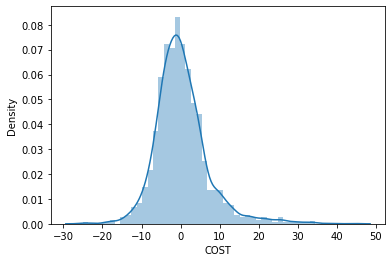

In [70]:
sns.distplot(y_test-predrf)
plt.show()

### Scatter plot between test data and prediction

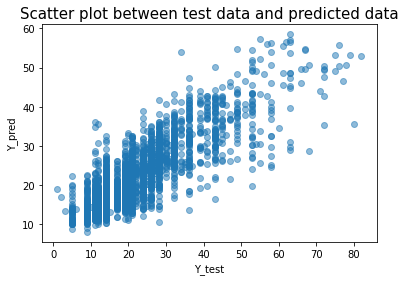

In [71]:
plt.scatter(y_test,predrf,alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

### Saving the model

### Importinf joblib

In [72]:
import joblib

### Save the model as a pickle in a file

In [73]:
joblib.dump(rf,'restaurant_cost_Prediction.pkl')

['restaurant_cost_Prediction.pkl']